### Self Organizing Map

### Part 1 - SOM

#### Importing dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#### Feature Scaling

In [2]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

#### Training the SOM

In [3]:
from minisom import MiniSom

# Plot a 10x10 SOM
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

#### Visualizing the results

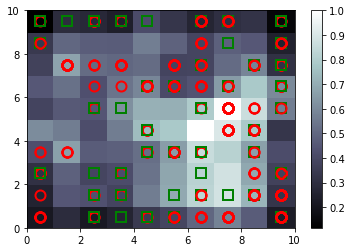

In [4]:
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
    # winning neuron/node is the neuron that the customer is mapped to (closest neuron)
    w = som.winner(x)
    # place marker in the middle
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)
show()

#### Finding the frauds

In [5]:
mappings = som.win_map(X) # not every node has a customer matched to it

# This line must be changed every run as mappings change every run
frauds = np.concatenate((mappings[(7,4)], mappings[(7,5)]), axis=0)

frauds = sc.inverse_transform(frauds) # potential frauds
frauds_df = pd.DataFrame(frauds)

In [6]:
frauds_df # index 0 indicates the frauds IDs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15739548.0,0.0,22.67,7.000,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,160.0,1.0
1,15699839.0,0.0,28.17,0.585,2.0,6.0,4.0,0.040,0.0,0.0,0.0,0.0,2.0,260.0,1005.0
2,15731586.0,0.0,29.50,2.000,1.0,10.0,8.0,2.000,0.0,0.0,0.0,0.0,2.0,256.0,18.0
3,15705918.0,0.0,37.33,2.500,2.0,3.0,8.0,0.210,0.0,0.0,0.0,0.0,2.0,260.0,247.0
4,15575605.0,0.0,24.75,13.665,2.0,11.0,8.0,1.500,0.0,0.0,0.0,0.0,2.0,280.0,2.0
5,15644453.0,0.0,18.17,10.000,1.0,11.0,8.0,0.165,0.0,0.0,0.0,0.0,2.0,340.0,1.0
6,15728523.0,0.0,38.33,4.415,2.0,8.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,160.0,1.0
7,15629750.0,0.0,24.33,2.500,1.0,3.0,5.0,4.500,0.0,0.0,0.0,0.0,2.0,200.0,457.0
8,15675926.0,0.0,19.17,5.415,2.0,3.0,8.0,0.290,0.0,0.0,0.0,0.0,2.0,80.0,485.0
9,15593834.0,0.0,16.33,0.210,2.0,6.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,200.0,2.0


Nodes with customers that have a high Mean Interneuron Distance (MID) have outliers in them; higher chance of them being outliers since after the long process of the SOM which will group up customers with similar attributes they still 'stand out'

#### Part 2 - Going from Unsupervised to Supervised Deep Learning

In [7]:
# Creating the matrix of features
customers = dataset.iloc[:, 1:].values # ditch the customer ID

# Creating the dependent variable (create a is_fraud attribute: the dependent y-variable)
is_fraud = np.zeros(len(dataset))

for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
customers = sc.fit_transform(customers)

In [8]:
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=2, kernel_initializer='uniform', activation='relu', input_dim=15))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(customers, is_fraud, batch_size=1, epochs=2)

Train on 690 samples
Epoch 1/2
690/690 [==============================] - 2s 3ms/sample - loss: 0.4969 - accuracy: 0.9420
Epoch 2/2
690/690 [==============================] - 1s 2ms/sample - loss: 0.1947 - accuracy: 0.9435


In [9]:
# Predicting the probabilities of frauds
y_pred = classifier.predict(customers)

y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis=1)
y_pred = y_pred[y_pred[:, 1].argsort()[::-1]]

y_pred_df = pd.DataFrame(y_pred)

y_pred contains customers and their predicted probabilities of being frauds, in descending order

In [10]:
y_pred_df

,0,1
0,15644453.0,0.347658
1,15687634.0,0.331880
2,15731586.0,0.331420
3,15605872.0,0.321186
4,15627328.0,0.320380
...,...,...
685,15728010.0,0.007301
686,15731989.0,0.007273
687,15654859.0,0.007221
688,15621423.0,0.006555
